In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/howpop_train.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
url                 134137 non-null object
domain              134137 non-null object
post_id             134137 non-null int64
published           134137 non-null object
author              97657 non-null object
flow                97048 non-null object
polling             134137 non-null bool
content_len         134137 non-null int64
title               134137 non-null object
comments            134137 non-null int64
favs                134137 non-null int64
views               134137 non-null int64
votes_plus          133566 non-null float64
votes_minus         133566 non-null float64
views_lognorm       134137 non-null float64
favs_lognorm        134137 non-null float64
comments_lognorm    134137 non-null float64
dtypes: bool(1), float64(5), int64(5), object(6)
memory usage: 16.5+ MB


In [8]:
df.shape

(134137, 17)

In [13]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


#### Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). 

In [17]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [25]:
df.describe(include = ['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/178457/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [26]:
# настройка внешнего вида графиков в seaborn
sns.set_style('dark')
sns.set_palette('RdBu')
sns.set_context('notebook', font_scale=1.5, rc={'figure.figsize' : (15, 5), 'axes.titlesize' : 18})

#### Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [30]:
print(df.published.dtype)
df.published = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


#### Создадим несколько столбцов на основе данных о времени публикации:

In [91]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['day'] = [d.day for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [92]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


#### 1. В каком месяце (и какого года) было больше всего публикаций?

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 18 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null datetime64[ns]
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
year           134137 non-null int64
month          134137 non-null int64
dayofweek      134137 non-null int64
hour           134137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 17.5+ MB


In [82]:
df['year'].value_counts().index[0]

2015

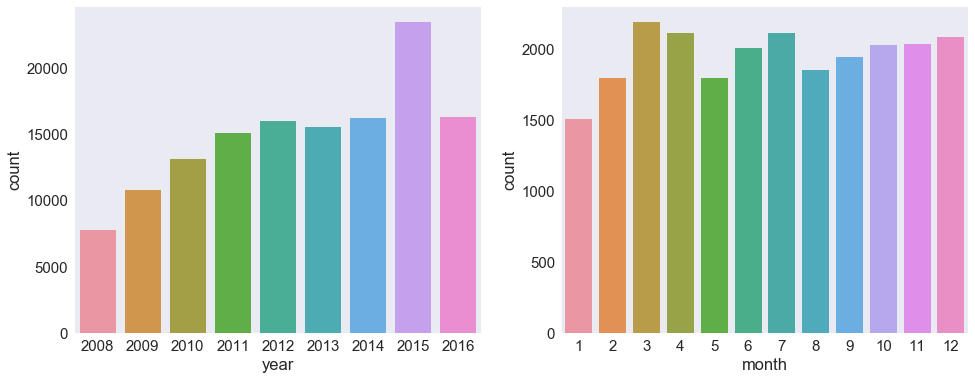

In [85]:
_, axes = plt.subplots(1, 2, figsize=(16,6))

sns.countplot(x='year', data=df, ax=axes[0])
sns.countplot(x='month', data=df[df['year'] == df['year'].value_counts().index[0]], ax=axes[1])

#### Ответ: 2015, март

In [52]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

#### 2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

1. Один или несколько дней сильно выделяются из общей картины
2. На хабре всегда больше статей, чем на гиктаймсе
3. По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

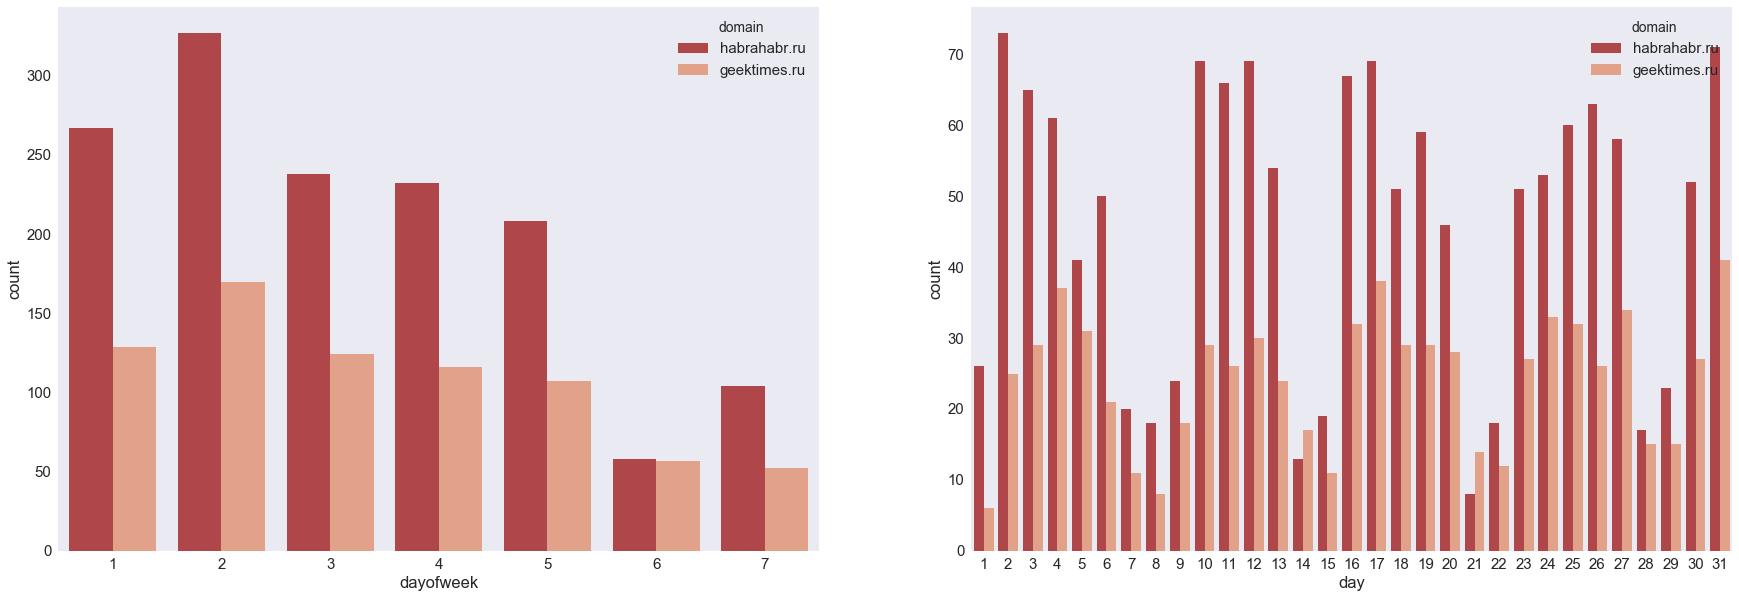

In [183]:
_, axes = plt.subplots(1, 2, figsize=(30, 10))
sns.countplot(x='dayofweek', hue='domain', data=df[(df['month'] == 3) & (df['year'] == 2015)], ax=axes[0])
sns.countplot(x='day', hue='domain', data=df[(df['month'] == 3) & (df['year'] == 2015)], ax=axes[1])

#### 3. Когда лучше всего публиковать статью?
1. Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
2. У опубликованных в 10 утра постов больше всего комментариев
3. Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
4. Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
5. На хабре дневные статьи комментируют чаще, чем вечерние

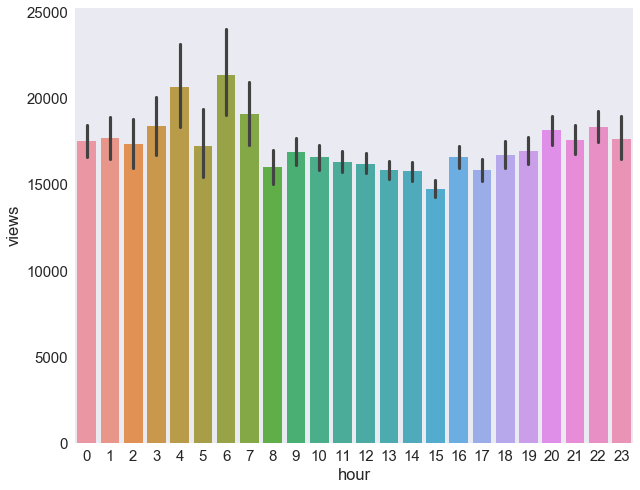

In [110]:
sns.barplot(x='hour', y='views', data=df)

In [184]:
df['domain'].unique()

array(['habrahabr.ru', 'geektimes.ru'], dtype=object)

In [186]:
df[df['domain'] == 'geektimes.ru'].sort_values('comments', ascending = False).head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2,1
65285,https://geektimes.ru/post/171853/,geektimes.ru,171853,2013-03-06 20:07:00,@vadimus,NaN,False,2220,Лучшие компьютерные игры всех времен и народов...,1887,392,160000,170.0,29.0,2013,3,3,20,6
38742,https://geektimes.ru/post/123122/,geektimes.ru,123122,2011-06-30 17:10:00,@MetallicAt,NaN,False,1390,Раздача слонов или инвайты на Google+,1829,17,1200,275.0,50.0,2011,6,4,17,30
126328,https://geektimes.ru/post/276000/,geektimes.ru,276000,2016-05-18 21:43:00,@alizar,NaN,False,5207,Завершено самое масштабное исследование влияни...,1578,234,165000,76.0,7.0,2016,5,3,21,18
127407,https://geektimes.ru/post/276928/,geektimes.ru,276928,2016-06-07 12:28:00,@veam,NaN,False,4832,«10 лет за школьную форму и хентай» сегодня ве...,1214,56,130000,40.0,6.0,2016,6,2,12,7


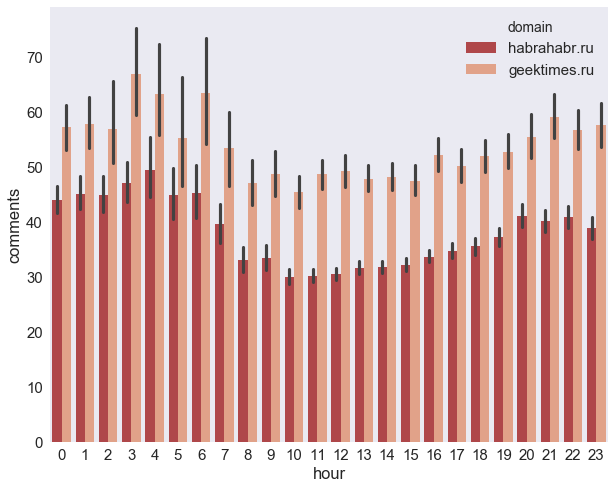

In [109]:
sns.barplot(x='hour', y='comments', hue='domain', data=df)

#### 4. Кого из топ-20 авторов чаще всего минусуют?

In [163]:
data = df.loc[df['author'].isin(df['author'].value_counts().head(20).index)]

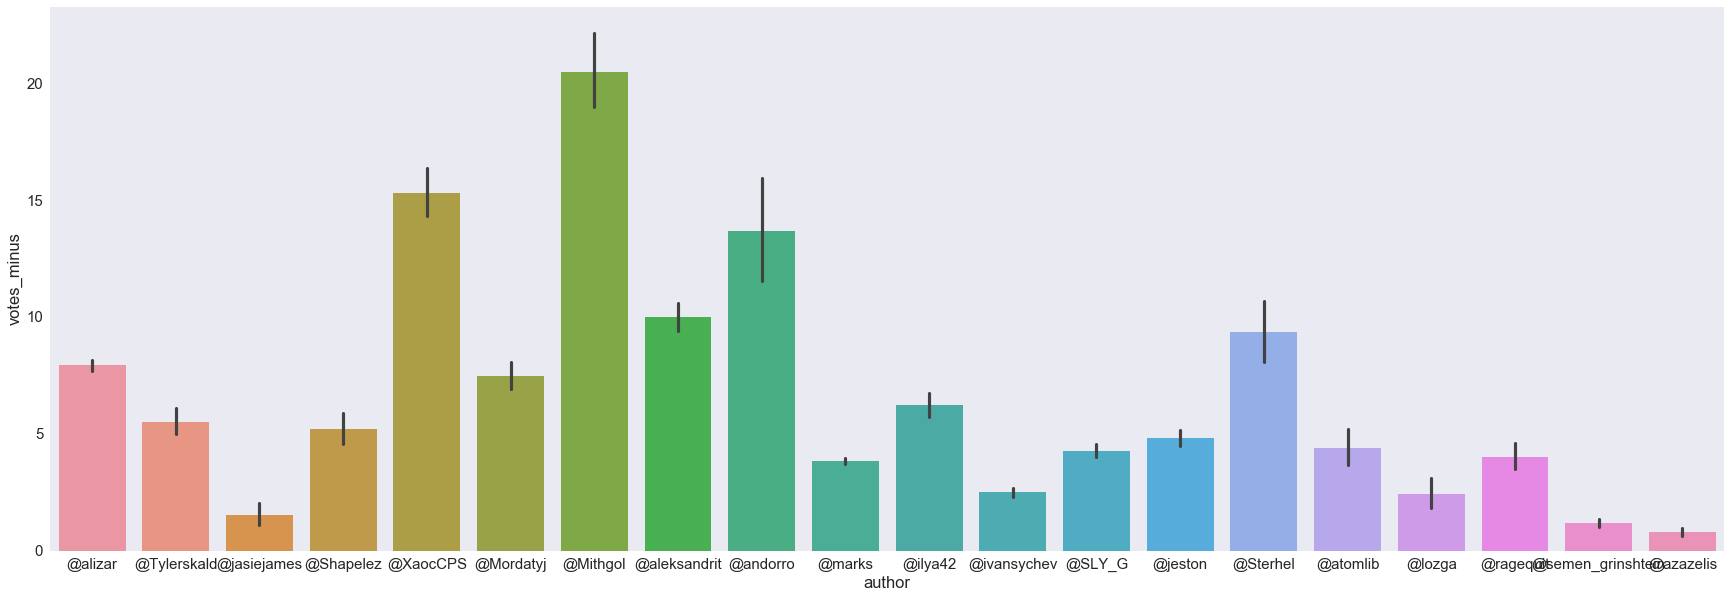

In [165]:
rcParams['figure.figsize'] = 30, 10

sns.barplot(x='author', y='votes_minus', data=data)

#### 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

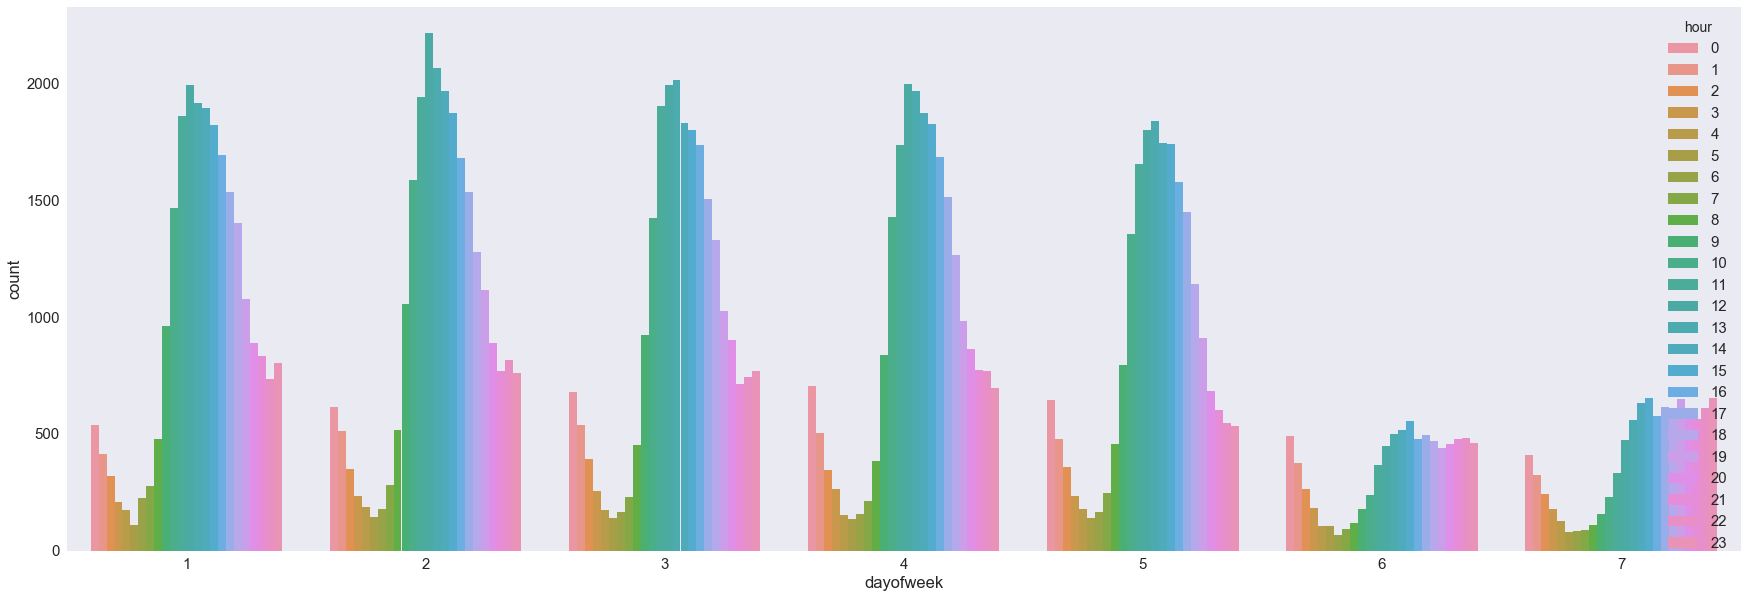

In [189]:
rcParams['figure.figsize'] = 30, 10
sns.countplot(x='dayofweek', hue='hour', data=df)

In [194]:
tmp_df = df.pivot_table(index = 'hour', values = 'title', aggfunc = 'count', columns='dayofweek')
tmp_df

dayofweek,1,2,3,4,5,6,7
hour,,,,,,,
0,537,614,679,704,644,492,409
1,415,512,540,503,477,376,326
2,320,349,393,346,360,263,241
3,209,233,255,264,234,182,181
4,173,186,175,155,177,107,127
5,111,143,140,134,139,105,79
6,226,178,167,157,168,69,83
7,279,282,232,214,246,95,90
8,477,519,451,386,458,118,111


In [195]:
tmp_df.sum()

dayofweek
1    23636
2    24575
3    23660
4    23082
5    21292
6     8380
7     9512
dtype: int64

In [196]:
tmp_df.apply(lambda x: 100. * x / tmp_df.sum(), axis = 1)

dayofweek,1,2,3,4,5,6,7
hour,,,,,,,
0,2.271958,2.498474,2.869822,3.049996,3.024610,5.871122,4.299832
1,1.755796,2.083418,2.282333,2.179187,2.240278,4.486874,3.427250
2,1.353867,1.420142,1.661031,1.499004,1.690776,3.138425,2.533642
3,0.884244,0.948118,1.077768,1.143748,1.099004,2.171838,1.902860
4,0.731934,0.756867,0.739645,0.671519,0.831298,1.276850,1.335156
5,0.469623,0.581892,0.591716,0.580539,0.652827,1.252983,0.830530
6,0.956169,0.724313,0.705833,0.680184,0.789029,0.823389,0.872582
7,1.180403,1.147508,0.980558,0.927129,1.155364,1.133652,0.946173
8,2.018108,2.111902,1.906171,1.672299,2.151043,1.408115,1.166947


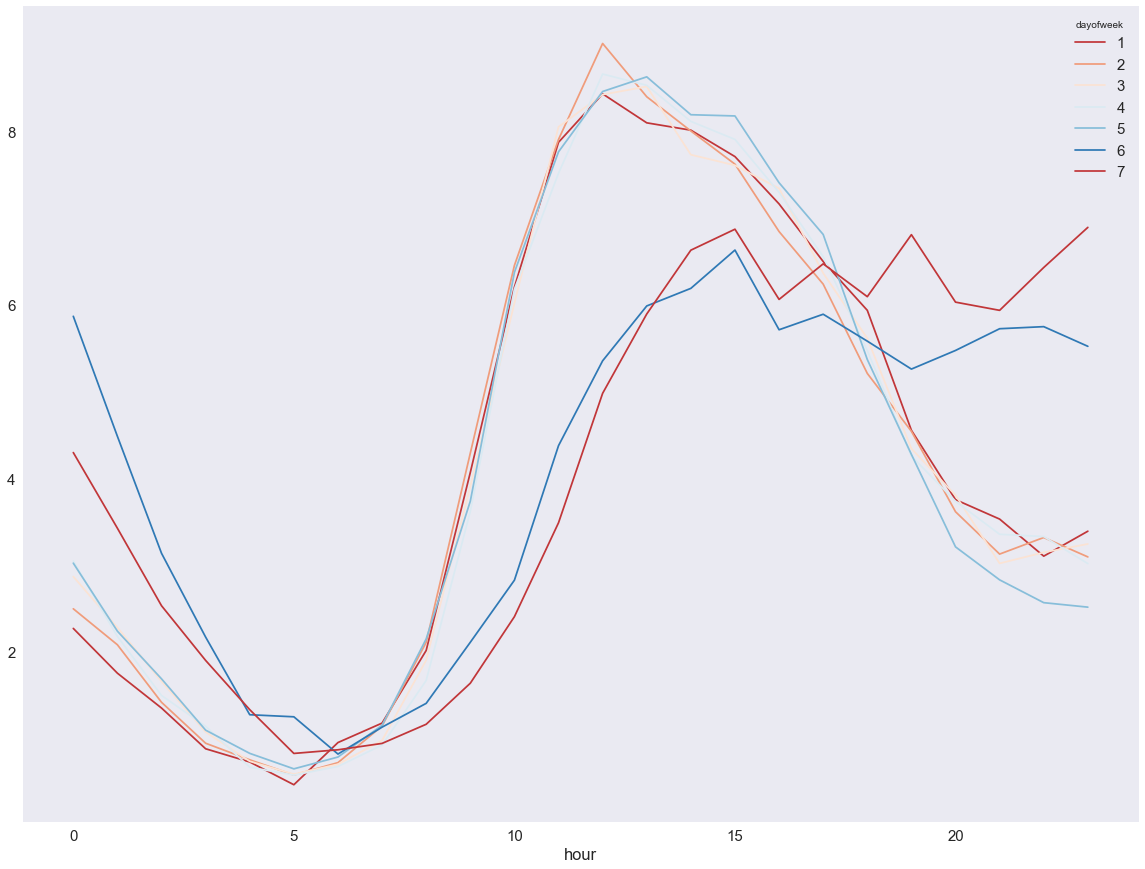

In [193]:
rcParams['figure.figsize'] = 20, 15
tmp_df.apply(lambda x: 100. * x / tmp_df.sum(), axis = 1).plot();